In [1]:
# importing the necessary libraries:
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr
import leidenalg

In [2]:
tumour = sc.read('../data/from_tumour/Anndata_combined_tumorNeutro_all_cells_preprocessed_annotated.h5ad')

In [4]:
print(tumour.obs['total_counts'])

Cell_10027413_0    15100.0
Cell_10027858_0     8024.0
Cell_10028589_0    10528.0
Cell_10029363_0    18953.0
Cell_10029749_0     4358.0
                    ...   
Cell_9914160_5      4099.0
Cell_9914204_5      3574.0
Cell_9914519_5      5819.0
Cell_9914949_5      4685.0
Cell_9916084_5      8752.0
Name: total_counts, Length: 35968, dtype: float32


In [6]:
raw = tumour.obs['total_counts']

print("Shape:", raw.shape)
print("Data type:", raw.dtype)

# basic stats
print("Min:", raw.min(), "Max:", raw.max())

# mean and median library size per cell
cell_sums = np.array(raw.sum(axis=1)).flatten()
print("Per-cell counts: min", cell_sums.min(), 
      "median", np.median(cell_sums), 
      "max", cell_sums.max())

# check first few rows (genes per cell)
print("First few entries:\n", raw[:5, :5].toarray() if hasattr(raw, "toarray") else raw[:5, :5])

Shape: (35968,)
Data type: float32
Min: 2001.0 Max: 39872.0


ValueError: No axis named 1 for object type Series

In [4]:
print(tumour.obs['leiden'])
print(tumour.obsm['X_umap'])

Cell_10027413_0     6
Cell_10027858_0     9
Cell_10028589_0    11
Cell_10029363_0     6
Cell_10029749_0     1
                   ..
Cell_9914160_5      1
Cell_9914204_5      1
Cell_9914519_5      5
Cell_9914949_5      3
Cell_9916084_5      8
Name: leiden, Length: 35968, dtype: category
Categories (28, object): ['0', '1', '2', '3', ..., '24', '25', '26', '27']
[[10.916149    7.4495296 ]
 [-1.976927    9.449481  ]
 [-1.6999298  11.993549  ]
 ...
 [ 5.970617   -2.488902  ]
 [ 7.9017067  -2.993752  ]
 [ 9.44984     0.76381713]]


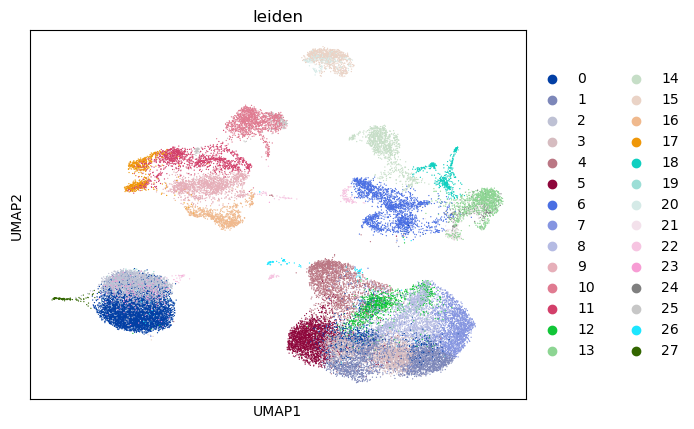

In [5]:
sc.pl.umap(tumour, color=['leiden'])

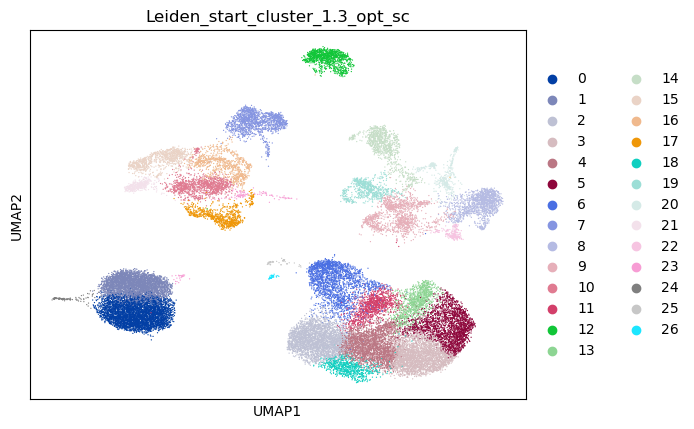

In [6]:
sc.pl.umap(tumour, color=['Leiden_start_cluster_1.3_opt_sc'])

In [7]:
# Map the barcodes to cell types
annotation_df = pd.read_csv('../data/from_tumour/tumour_neutro_Anndata_annotation.csv')
tmp = annotation_df.set_index('cell_barcode')
obs_names = tumour.obs_names[tumour.obs_names.isin(tmp.index)]
tumour_anno = tumour[obs_names]
tumour_anno.obs['cell_type'] = tmp.loc[obs_names, 'cell_type']
#wound.obs['cell_type'] = wound.obs.index.map(annotation_df.set_index('cell_barcode')['cell_type'])
tumour = tumour_anno

In [8]:
# Check which barcodes are missing from the annotation_df
missing_barcodes = tumour.obs.index[~tumour.obs.index.isin(annotation_df['cell_barcode'])]

# Print the number and some examples of missing barcodes
print(f"Number of missing barcodes: {len(missing_barcodes)}")
print(missing_barcodes[:10])


Number of missing barcodes: 0
Index([], dtype='object')


In [9]:
# saving the Anndata object
tumour.write('tumour_with_annotation.h5ad')

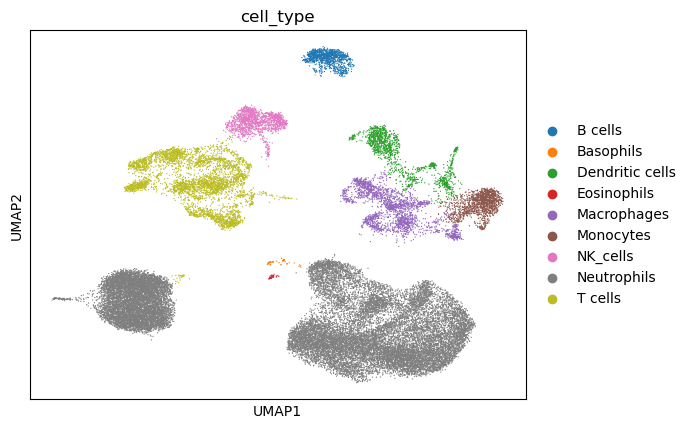

In [10]:
sc.pl.umap(tumour, color=['cell_type'])